# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading

* **Pytorch Version** 



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)   
* [RLlib Section](#7)            

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-yktmi7kw
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-yktmi7kw
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-w3cu4s_3/pyfolio_a41d32cf6e2d45f5b1fb54a091546427
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-w3cu4s_3/pyfolio_a41d32cf6e2d45f5b1fb54a091546427
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-w3cu4s_3/elegantrl_cd25401185fa40a39284c177bde493a7
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-w3cu4s_3/elegantrl_cd25401185fa40a39284c177bde493a7
     |████████████████████████████████| 234 kB 8.0 MB/s 
     |████████████████████████████████| 177 kB 48.9 MB/s 
     |██████████████████████

In [ ]:
from finrl import config
from finrl import config_tickers
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.finrl_meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


<a id='1.4'></a>
## 2.4. Create Folders

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [ ]:
# print(config_tickers.DOW_30_TICKER)

In [ ]:
#FX_IDC_USDGBP
!gdown --id 1rgtkD35D_XxwFoovGLFom3_ojRvPFyeI
#FX_IDC_USDAUD 1DAY
!gdown --id 149sQHIF-il4iip76x7UhrLP88o16JYRg
#FX_USDCAD  1DAY
!gdown --id 1FFTzUMR9-1umCQlH3bp453SHXZFSWzCp
#FX_USDCHF
!gdown --id 1nD4iVk-A0PAFEjJ_ziMHRRTngHKMZt-K
#FX_EURUSD, 1D
!gdown --id 15GiISZwR8EM9SsLVd_gobQIDTikpZZcQ  
#FX_USDJPY, 1D
!gdown --id 1_F0go2NXmTfMx-YXuQFEY2kGq0sCAlHG
#FX_EURAUD, 1D
!gdown --id 1dFAbrS9KQLzse591GvFQZsYSSvQqgmNy

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rgtkD35D_XxwFoovGLFom3_ojRvPFyeI
To: /content/FX_IDC_USDGBP, 1D (1).csv
100% 4.10M/4.10M [00:00<00:00, 312MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=149sQHIF-il4iip76x7UhrLP88o16JYRg
To: /content/FX_IDC_USDAUD, 1D.csv
100% 4.02M/4.02M [00:00<00:00, 309MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Do

In [ ]:
df1 = pd.read_csv('/content/FX_EURAUD, 1D.csv')
df2 = pd.read_csv('/content/FX_EURUSD, 1D (5).csv')
df3 = pd.read_csv('/content/FX_IDC_USDAUD, 1D.csv')
df4 = pd.read_csv('/content/FX_IDC_USDGBP, 1D (1).csv')
df5 = pd.read_csv('/content/FX_USDCAD, 1D.csv')
df6 = pd.read_csv('/content/FX_USDCHF, 1D.csv')
df7 = pd.read_csv('/content/FX_USDJPY, 1D.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7502 entries, 0 to 7501
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              7502 non-null   object 
 1   open              7502 non-null   float64
 2   high              7502 non-null   float64
 3   low               7502 non-null   float64
 4   close             7502 non-null   float64
 5   MA                7494 non-null   float64
 6   Smoothing Line    7490 non-null   float64
 7   EMA               7494 non-null   float64
 8   Smoothing Line.1  7490 non-null   float64
 9   DEMA              7486 non-null   float64
 10  Volume            7502 non-null   int64  
 11  Volume MA         7483 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 703.4+ KB


In [ ]:
def transformdata2 (df, ticname):
  df['time'] = pd.to_datetime(df['time'])
  df = df.rename(columns={'time': 'date', 'Volume': 'volume'})
  df['day'] = df['date'].dt.dayofweek
  df['date'] = df['date'].dt.date
  df['tic'] = ticname 
  df = df[['date', 'open', 'high','low','close', 'volume','tic','day']]
  return df

In [ ]:
df1trans = transformdata2 (df1, 'EURAUD')
df2trans = transformdata2 (df2, 'EURUSD')
df3trans = transformdata2 (df3, 'USDAUD')
df4trans = transformdata2 (df4, 'USDGBP')
df5trans = transformdata2 (df5, 'USDCAD')
df6trans = transformdata2 (df6, 'USDCHF')
df7trans = transformdata2 (df7, 'USDJPY')

In [ ]:
df = pd.concat([df1trans
                , df2trans
                , df3trans, df4trans, df5trans, df6trans, df7trans
                ])

In [ ]:
df

,date,open,high,low,close,volume,tic,day
0,1993-05-09,1.75272,1.77199,1.75272,1.76307,0,EURAUD,6
1,1993-05-10,1.76307,1.77368,1.75904,1.75904,0,EURAUD,0
2,1993-05-11,1.75904,1.76988,1.74380,1.74380,0,EURAUD,1
3,1993-05-12,1.74380,1.75541,1.73909,1.75541,0,EURAUD,2
4,1993-05-13,1.75541,1.76368,1.74637,1.74637,0,EURAUD,3
...,...,...,...,...,...,...,...,...
7535,2022-05-11,129.93900,130.05400,127.51600,128.26300,1259196,USDJPY,2
7536,2022-05-12,128.26300,129.45400,128.24800,129.24500,450358,USDJPY,3
7537,2022-05-15,129.28800,129.64000,128.69900,129.11300,326777,USDJPY,6
7538,2022-05-16,129.11300,129.77900,128.82700,129.35600,335378,USDJPY,0


In [ ]:
df = df.sort_values(by=["date", "tic"]).reset_index(drop=True)

In [ ]:
def preprocessing_data(df, n_tics = 6):
  df = df[df.groupby('date').date.transform('count')>n_tics].copy() 
  df = df.reset_index()
  df = df.replace([np.inf, -np.inf], 0)
  return df

In [ ]:
df = preprocessing_data(df)
print(df)

       index        date       open       high        low      close  volume  \
0       1014  1993-05-10    1.76307    1.77368    1.75904    1.75904       0   
1       1015  1993-05-10    1.24131    1.24131    1.23771    1.23771       0   
2       1016  1993-05-10    1.41110    1.42720    1.41040    1.42370       0   
3       1017  1993-05-10    1.26830    1.27110    1.26610    1.27110       0   
4       1018  1993-05-10    1.42710    1.46090    1.42650    1.45860       0   
...      ...         ...        ...        ...        ...        ...     ...   
41477  53696  2022-05-17    1.43371    1.43484    1.42055    1.42211       0   
41478  53697  2022-05-17    1.28449    1.28586    1.28065    1.28094  251146   
41479  53698  2022-05-17    1.00176    1.00237    0.99181    0.99278  169923   
41480  53699  2022-05-17    0.81153    0.81168    0.80012    0.80062       0   
41481  53700  2022-05-17  129.35600  129.53600  128.94100  129.13000  152327   

          tic  day  
0      EURAUD    0

In [ ]:
df

,index,date,open,high,low,close,volume,tic,day
0,1014,1993-05-10,1.76307,1.77368,1.75904,1.75904,0,EURAUD,0
1,1015,1993-05-10,1.24131,1.24131,1.23771,1.23771,0,EURUSD,0
2,1016,1993-05-10,1.41110,1.42720,1.41040,1.42370,0,USDAUD,0
3,1017,1993-05-10,1.26830,1.27110,1.26610,1.27110,0,USDCAD,0
4,1018,1993-05-10,1.42710,1.46090,1.42650,1.45860,0,USDCHF,0
...,...,...,...,...,...,...,...,...,...
41477,53696,2022-05-17,1.43371,1.43484,1.42055,1.42211,0,USDAUD,1
41478,53697,2022-05-17,1.28449,1.28586,1.28065,1.28094,251146,USDCAD,1
41479,53698,2022-05-17,1.00176,1.00237,0.99181,0.99278,169923,USDCHF,1
41480,53699,2022-05-17,0.81153,0.81168,0.80012,0.80062,0,USDGBP,1


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41482 entries, 0 to 41481
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   41482 non-null  int64  
 1   date    41482 non-null  object 
 2   open    41482 non-null  float64
 3   high    41482 non-null  float64
 4   low     41482 non-null  float64
 5   close   41482 non-null  float64
 6   volume  41482 non-null  int64  
 7   tic     41482 non-null  object 
 8   day     41482 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.2+ MB


In [ ]:
df.to_csv('/content/transform.csv', index=False)
df = pd.read_csv('/content/transform.csv')

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (7309, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
config.INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
processed

,index,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,1014,1993-05-10,1.76307,1.77368,1.75904,1.75904,0,EURAUD,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.759040,1.759040,13.720000,0.00000
1,1015,1993-05-10,1.24131,1.24131,1.23771,1.23771,0,EURUSD,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.237710,1.237710,13.720000,0.00000
2,1016,1993-05-10,1.41110,1.42720,1.41040,1.42370,0,USDAUD,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.423700,1.423700,13.720000,0.00000
3,1017,1993-05-10,1.26830,1.27110,1.26610,1.27110,0,USDCAD,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.271100,1.271100,13.720000,0.00000
4,1018,1993-05-10,1.42710,1.46090,1.42650,1.45860,0,USDCHF,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.458600,1.458600,13.720000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40406,53689,2022-05-16,1.44100,1.45476,1.43234,1.43390,0,USDAUD,0,0.022582,1.470520,1.316685,58.366845,120.064722,19.295117,1.373169,1.376788,27.469999,13.56656
40407,53690,2022-05-16,1.29163,1.29814,1.28362,1.28449,279373,USDCAD,0,0.008995,1.310764,1.243793,53.756782,82.904547,0.330439,1.268975,1.269934,27.469999,13.56656
40408,53691,2022-05-16,1.00131,1.00643,1.00072,1.00176,148198,USDCHF,0,0.017009,1.013379,0.923431,73.113053,142.765555,73.491745,0.955353,0.940382,27.469999,13.56656
40409,53692,2022-05-16,0.81549,0.81848,0.81113,0.81160,0,USDGBP,0,0.013895,0.831083,0.750746,66.969186,115.218993,47.222252,0.781715,0.764824,27.469999,13.56656


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [ ]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,index,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,1993-05-10,EURAUD,1014.0,1.76307,1.77368,1.75904,1.75904,0.0,0.0,0.000000,1.772973,1.729867,0.0,-66.666667,100.0,1.75904,1.75904,13.72,0.0
1,1993-05-10,EURUSD,1015.0,1.24131,1.24131,1.23771,1.23771,0.0,0.0,0.000000,1.772973,1.729867,0.0,-66.666667,100.0,1.23771,1.23771,13.72,0.0
2,1993-05-10,USDAUD,1016.0,1.41110,1.42720,1.41040,1.42370,0.0,0.0,0.000000,1.772973,1.729867,0.0,-66.666667,100.0,1.42370,1.42370,13.72,0.0
3,1993-05-10,USDCAD,1017.0,1.26830,1.27110,1.26610,1.27110,0.0,0.0,0.000000,1.772973,1.729867,0.0,-66.666667,100.0,1.27110,1.27110,13.72,0.0
4,1993-05-10,USDCHF,1018.0,1.42710,1.46090,1.42650,1.45860,0.0,0.0,0.000000,1.772973,1.729867,0.0,-66.666667,100.0,1.45860,1.45860,13.72,0.0
5,1993-05-10,USDGBP,1019.0,0.63840,0.65320,0.63800,0.65130,0.0,0.0,0.000000,1.772973,1.729867,0.0,-66.666667,100.0,0.65130,0.65130,13.72,0.0
6,1993-05-10,USDJPY,1020.0,111.76000,112.91000,111.06000,111.26000,0.0,0.0,0.000000,1.772973,1.729867,0.0,-66.666667,100.0,111.26000,111.26000,13.72,0.0
7,1993-05-11,EURAUD,1021.0,1.75904,1.76988,1.74380,1.74380,0.0,1.0,-0.000342,1.772973,1.729867,0.0,-66.666667,100.0,1.75142,1.75142,13.35,0.0
8,1993-05-11,EURUSD,1022.0,1.23771,1.23771,1.23541,1.23541,0.0,1.0,-0.000052,1.239813,1.233307,0.0,-66.666667,100.0,1.23656,1.23656,13.35,0.0
9,1993-05-11,USDAUD,1023.0,1.42370,1.43160,1.42160,1.42320,0.0,1.0,-0.000011,1.424157,1.422743,0.0,66.666667,100.0,1.42345,1.42345,13.35,0.0


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

## Training data split: 2009-01-01 to 2020-07-01
## Trade data split: 2020-07-01 to 2021-10-31

In [ ]:
train = data_split(processed_full, '2009-01-01','2020-07-01')
trade = data_split(processed_full, '2020-07-01','2021-10-31')
print(len(train))
print(len(trade))

16079
1883


In [ ]:
train.tail()

,date,tic,level_0,index,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
2296,2020-06-30,USDAUD,22498.0,7495.0,1.45590,1.46330,1.44704,1.44847,0.0,1.0,-0.018731,1.498213,1.410920,41.807377,-49.914515,20.192722,1.480309,1.542418,30.43,7.095548
2296,2020-06-30,USDCAD,38003.0,7048.0,1.36579,1.36995,1.35698,1.35740,296971.0,1.0,-0.006230,1.376453,1.336339,46.135912,-31.909477,6.013050,1.369997,1.390824,30.43,7.095548
2296,2020-06-30,USDCHF,45545.0,7049.0,0.95115,0.95330,0.94613,0.94721,177014.0,1.0,-0.004764,0.967079,0.938464,43.216031,-73.022291,32.384453,0.958553,0.964626,30.43,7.095548
2296,2020-06-30,USDGBP,30460.0,7605.0,0.81301,0.81568,0.80637,0.80638,0.0,1.0,0.000134,0.816995,0.781480,51.747770,29.967982,21.526110,0.804946,0.809776,30.43,7.095548
2296,2020-06-30,USDJPY,53063.0,7051.0,107.92100,108.16500,107.36100,107.46800,201039.0,1.0,-0.090771,109.271693,105.940607,49.055541,18.432361,3.809380,107.539067,107.771517,30.43,7.095548


In [ ]:
trade.head()

,date,tic,level_0,index,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,EURAUD,7013.0,7014.0,1.62686,1.63058,1.62196,1.62235,655348.0,2.0,-0.011325,1.653004,1.611724,43.159127,-74.839927,22.777139,1.644343,1.689124,28.620001,1.859735
0,2020-07-01,EURUSD,14515.0,7014.0,1.12331,1.12752,1.11852,1.12506,316459.0,2.0,0.006122,1.139566,1.110933,55.925350,43.687555,24.295995,1.113875,1.100375,28.620001,1.859735
0,2020-07-01,USDAUD,22499.0,7496.0,1.44830,1.45372,1.44042,1.44625,0.0,2.0,-0.017954,1.486051,1.416609,41.526434,-57.402134,24.259939,1.477171,1.537726,28.620001,1.859735
0,2020-07-01,USDCAD,38004.0,7049.0,1.35740,1.36016,1.35457,1.35852,256350.0,2.0,-0.005854,1.373622,1.337505,46.459890,-42.083313,8.756491,1.368593,1.389269,28.620001,1.859735
0,2020-07-01,USDCHF,45546.0,7050.0,0.94721,0.94939,0.94449,0.94576,169892.0,2.0,-0.004750,0.964397,0.938937,42.611755,-84.000129,34.939562,0.957650,0.964260,28.620001,1.859735


In [ ]:
config.INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 7, State Space: 71


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

## Environment for Training



In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [ ]:
agent = DRLAgent(env = env_train)

### Model Training: 5 models, A2C DDPG, PPO, TD3, SAC


### Model 1: A2C


In [ ]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
----------------------------------------
| time/                 |              |
|    fps                | 236          |
|    iterations         | 169200       |
|    time_elapsed       | 3576         |
|    total_timesteps    | 846000       |
| train/                |              |
|    entropy_loss       | -51.4        |
|    explained_variance | -0.0311      |
|    learning_rate      | 0.0007       |
|    n_updates          | 240483       |
|    policy_loss        | 59.9         |
|    reward             | -0.006978526 |
|    std                | 389          |
|    value_loss         | 1.68         |
----------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 236         |
|    iterations         | 169300      |
|    time_elapsed       | 3578        |
|    total_timesteps    | 846500      |
| train/                |             |
|    entropy_

### Model 2: DDPG

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=100000)

day: 2298, episode: 240
begin_total_asset: 1000000.00
end_total_asset: 1000000.00
total_reward: 0.00
total_cost: 0.00
total_trades: 0
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 114      |
|    time_elapsed    | 80       |
|    total_timesteps | 9196     |
| train/             |          |
|    actor_loss      | 5.54e+03 |
|    critic_loss     | 6.26e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 6897     |
|    reward          | 0.0      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 105      |
|    time_elapsed    | 173      |
|    total_timesteps | 18392    |
| train/             |          |
|    actor_loss      | 3.94e+03 |
|    critic_loss     | 6.63e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 16093    |
|    reward          | 0.0      |
----------------

### Model 3: PPO

In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=100000)

-------------------------------------
| time/              |              |
|    fps             | 419          |
|    iterations      | 1            |
|    time_elapsed    | 4            |
|    total_timesteps | 2048         |
| train/             |              |
|    reward          | 0.0020582709 |
-------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 390           |
|    iterations           | 2             |
|    time_elapsed         | 10            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.0061889878  |
|    clip_fraction        | 0.0532        |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.83         |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.00025       |
|    loss                 | -0.0434       |
|    n_updates            | 10            

### Model 4: TD3

In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cuda device


In [ ]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=10000)

day: 2298, episode: 330
begin_total_asset: 1000000.00
end_total_asset: 972967.89
total_reward: -27032.11
total_cost: 284.88
total_trades: 2298
Sharpe: -0.213
-------------------------------------
| time/              |              |
|    episodes        | 4            |
|    fps             | 139          |
|    time_elapsed    | 65           |
|    total_timesteps | 9196         |
| train/             |              |
|    actor_loss      | -1.9e+03     |
|    critic_loss     | 2.78e+05     |
|    learning_rate   | 0.001        |
|    n_updates       | 6897         |
|    reward          | -0.018625041 |
-------------------------------------


### Model 5: SAC

In [ ]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device


In [ ]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=100000)

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 67       |
|    time_elapsed    | 136      |
|    total_timesteps | 9196     |
| train/             |          |
|    actor_loss      | 4.2e+03  |
|    critic_loss     | 1.69e+05 |
|    ent_coef        | 0.248    |
|    ent_coef_loss   | 57.4     |
|    learning_rate   | 0.0001   |
|    n_updates       | 9095     |
|    reward          | 0.0      |
---------------------------------
day: 2298, episode: 340
begin_total_asset: 1000000.00
end_total_asset: 1000000.00
total_reward: 0.00
total_cost: 0.00
total_trades: 0
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 67       |
|    time_elapsed    | 274      |
|    total_timesteps | 18392    |
| train/             |          |
|    actor_loss      | 3.3e+03  |
|    critic_loss     | 5.45e+04 |
|    ent_coef        | 0.623    |
|    ent_coef_lo

## Trading
Assume that we have $1,000,000 initial capital at 2020-07-01. We use the DDPG model to trade Dow jones 30 stocks.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data, if current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<'2020-07-01') & (processed_full.date>='2009-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
insample_risk_indicator.vix.describe()

count    2297.000000
mean       18.878755
std         8.522991
min         9.150000
25%        13.370000
50%        16.209999
75%        21.299999
max        82.690002
Name: vix, dtype: float64

In [ ]:
insample_risk_indicator.vix.quantile(0.996)

57.07632174682617

In [ ]:
insample_risk_indicator.turbulence.describe()

count     2297.000000
mean        15.021925
std        364.158263
min          0.206908
25%          2.782378
50%          4.920710
75%          8.545936
max      17447.191304
Name: turbulence, dtype: float64

In [ ]:
insample_risk_indicator.turbulence.quantile(0.996)

68.64716009788303

### Trade

DRL model needs to update periodically in order to take full advantage of the data, ideally we need to retrain our model yearly, quarterly, or monthly. We also need to tune the parameters along the way, in this notebook I only use the in-sample data from 2009-01 to 2020-07 to tune the parameters once, so there is some alpha decay here as the length of trade date extends. 

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [ ]:
# trade = data_split(processed_full, '2020-07-01','2021-10-31')
e_trade_gym = StockTradingEnv(df = trade, 
                              turbulence_threshold = 70,
                              risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [ ]:
trade.head()

,date,tic,level_0,index,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,EURAUD,7013.0,7014.0,1.62686,1.63058,1.62196,1.62235,655348.0,2.0,-0.011325,1.653004,1.611724,43.159127,-74.839927,22.777139,1.644343,1.689124,28.620001,1.859735
0,2020-07-01,EURUSD,14515.0,7014.0,1.12331,1.12752,1.11852,1.12506,316459.0,2.0,0.006122,1.139566,1.110933,55.925350,43.687555,24.295995,1.113875,1.100375,28.620001,1.859735
0,2020-07-01,USDAUD,22499.0,7496.0,1.44830,1.45372,1.44042,1.44625,0.0,2.0,-0.017954,1.486051,1.416609,41.526434,-57.402134,24.259939,1.477171,1.537726,28.620001,1.859735
0,2020-07-01,USDCAD,38004.0,7049.0,1.35740,1.36016,1.35457,1.35852,256350.0,2.0,-0.005854,1.373622,1.337505,46.459890,-42.083313,8.756491,1.368593,1.389269,28.620001,1.859735
0,2020-07-01,USDCHF,45546.0,7050.0,0.94721,0.94939,0.94449,0.94576,169892.0,2.0,-0.004750,0.964397,0.938937,42.611755,-84.000129,34.939562,0.957650,0.964260,28.620001,1.859735


In [ ]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym)

hit end!


In [ ]:
df_account_value.shape

(269, 2)

In [ ]:
df_account_value.tail()

,date,account_value
264,2021-10-21,1.072961e+06
265,2021-10-25,1.079076e+06
266,2021-10-26,1.076157e+06
267,2021-10-27,1.073751e+06
268,2021-10-28,1.077508e+06


In [ ]:
df_actions.shape

(268, 7)

In [ ]:
df_actions.head()

,EURAUD,EURUSD,USDAUD,USDCAD,USDCHF,USDGBP,USDJPY
date,,,,,,,
2020-07-01,0,0,100,0,100,0,100
2020-07-02,0,0,100,0,100,0,100
2020-07-06,0,0,100,0,100,0,100
2020-07-07,0,0,100,0,100,0,100
2020-07-08,0,0,100,0,100,0,100


In [ ]:
df_actions

,EURAUD,EURUSD,USDAUD,USDCAD,USDCHF,USDGBP,USDJPY
date,,,,,,,
2020-07-01,0,0,100,0,100,0,100
2020-07-02,0,0,100,0,100,0,100
2020-07-06,0,0,100,0,100,0,100
2020-07-07,0,0,100,0,100,0,100
2020-07-08,0,0,100,0,100,0,100
...,...,...,...,...,...,...,...
2021-10-20,0,0,0,0,0,0,0
2021-10-21,0,0,0,0,0,0,0
2021-10-25,0,0,0,0,0,0,0


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.072437
Cumulative returns     0.077508
Annual volatility      0.052249
Sharpe ratio           1.369642
Calmar ratio           2.576903
Stability              0.719076
Max drawdown          -0.028110
Omega ratio            1.265718
Sortino ratio          2.166054
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.085651
Daily value at risk   -0.006299
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')


==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (335, 8)
Annual return          0.273520
Cumulative returns     0.379084
Annual volatility      0.139248
Sharpe ratio           1.811893
Calmar ratio           3.062662
Stability              0.918651
Max drawdown          -0.089308
Omega ratio            1.351851
Sortino ratio          2.684720
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.051856
Daily value at risk   -0.016542
dtype: float64


In [ ]:
df_account_value.loc[0,'date']

'2020-07-01'

In [ ]:
df_account_value.loc[len(df_account_value)-1,'date']

'2021-10-28'

<a id='6.2'></a>
## 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (335, 8)


Start date,2020-07-01
End date,2021-10-28
Total months,12
,Backtest
Annual return,7.244%
Cumulative returns,7.751%
Annual volatility,5.225%
Sharpe ratio,1.37
Calmar ratio,2.58
Stability,0.72
Max drawdown,-2.811%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2.81,2020-08-12,2021-01-04,2021-02-16,135
1,2.52,2021-03-30,2021-04-22,2021-06-22,61
2,2.19,2021-06-30,2021-08-02,2021-09-27,64
3,0.78,2021-10-18,2021-10-21,NaT,NaN
4,0.77,2021-09-28,2021-09-30,2021-10-07,8


Stress Events,mean,min,max
New Normal,0.03%,-0.82%,1.43%


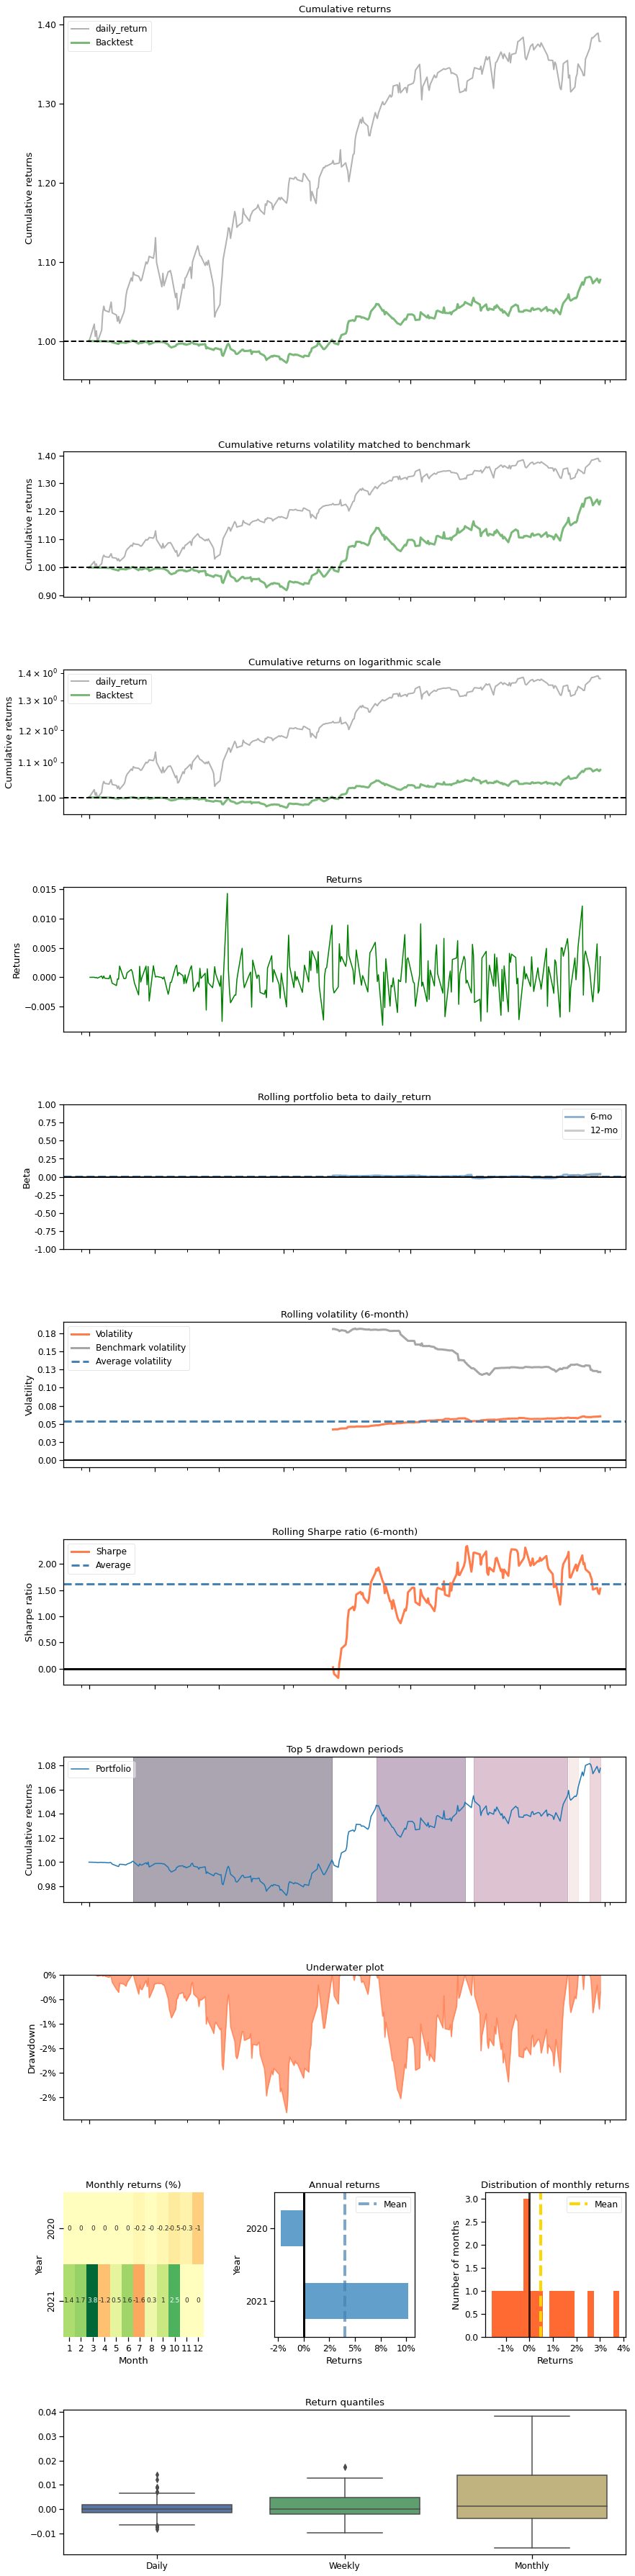

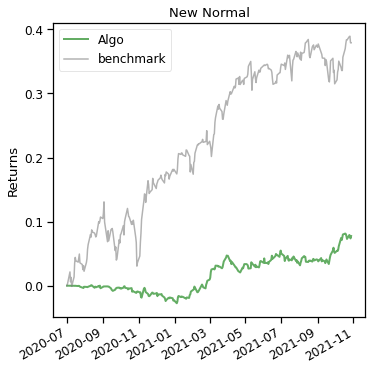

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])